In [110]:
import numpy as np
from dipy.io.image import save_nifti, load_nifti
import torchio as tio
import torch
import matplotlib.pyplot as plt
import random

from monai.transforms import NormalizeIntensityd

# random.seed(0)
# random seed 고정
# torch.manual_seed(0)

def show_img(img):
    img = np.squeeze(img)
    plt.figure(dpi=150)
    plt.imshow(img, cmap='gray')
    # plt.colorbar()
    cbar = plt.colorbar(shrink=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.show()


### Load data & Domain permutation

Loaded data of size: (300, 320, 208, 1)
<class 'numpy.memmap'>
Permuted data of size: (300, 208, 320, 1)
Truncated data of size: (200, 200, 180)


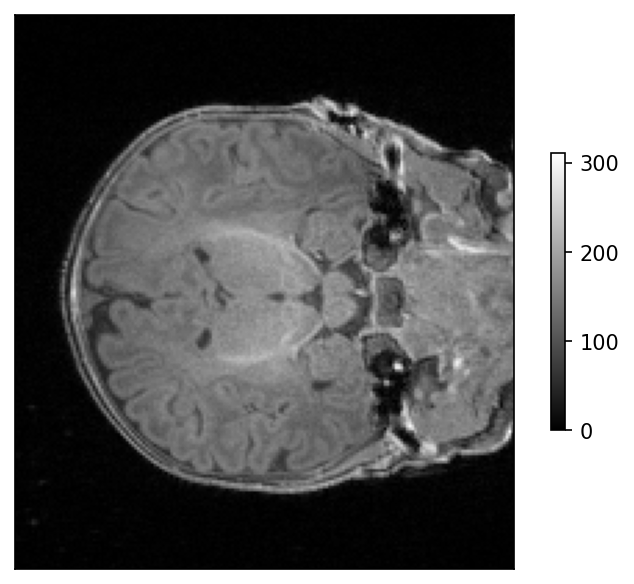

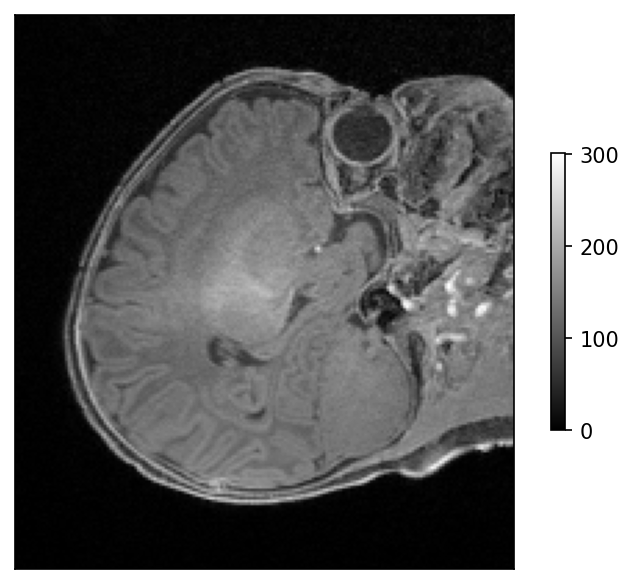

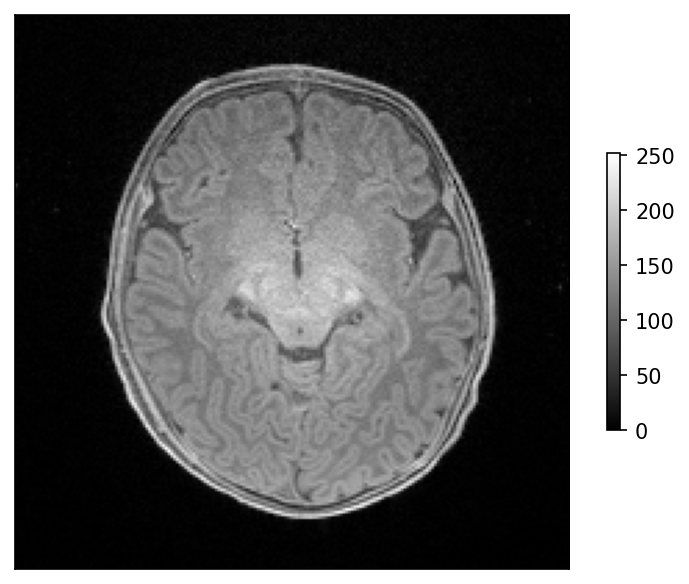

In [111]:
dataroot= 'mprage_BCP_G.nii'
raw_data, _ = load_nifti(dataroot)
print('Loaded data of size:', raw_data.shape)
print(type(raw_data))

perm_raw_data = np.transpose(raw_data, (0,2,1,3))
print('Permuted data of size:', perm_raw_data.shape)

perm_data = perm_raw_data[65:265,0:200,50:230,:].squeeze()
print('Truncated data of size:', perm_data.shape)

xx = 100
yy = 80
zz = 100
show_img(perm_data[xx,:,:].squeeze())
show_img(perm_data[:,yy,:].squeeze())
show_img(perm_data[:,:,zz].squeeze())

### MONAI normalization & Min, Max, Mean, Std

Max: 577
Min: 0
Mean: 43.24270986111111
Std: 61.21187985510285
Max: 8.719831
Min: -0.7064431
Mean: 4.937066e-08
Std: 1.0000002


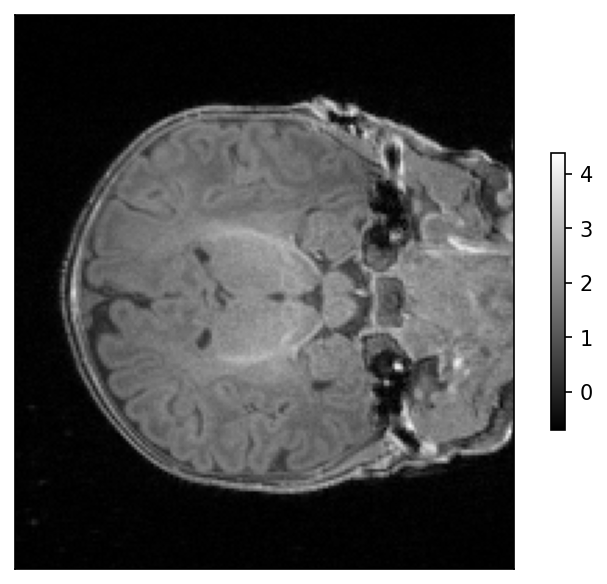

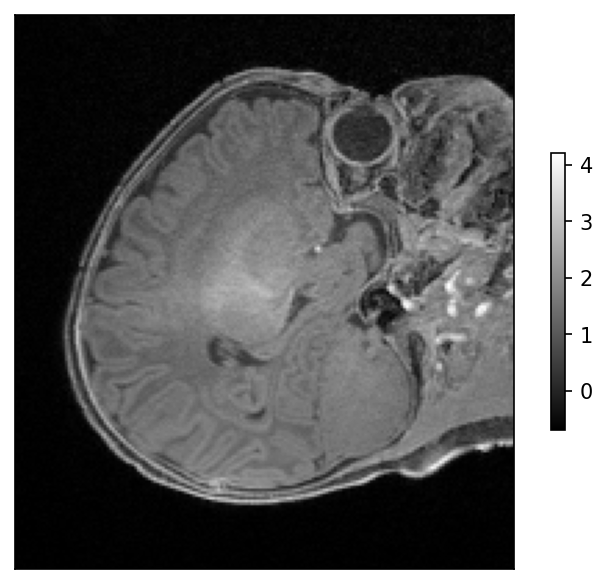

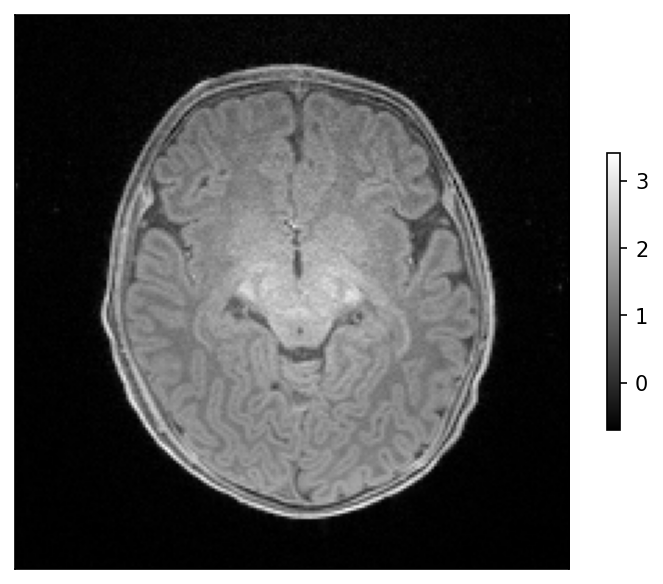

In [112]:
max_value = np.max(perm_data)
print("Max:", max_value)

min_value = np.min(perm_data)
print("Min:", min_value)

mean_value = np.mean(perm_data)
print("Mean:", mean_value)

std_value = np.std(perm_data)
print("Std:", std_value)

normalize = NormalizeIntensityd(keys=["image"], subtrahend=mean_value, divisor=std_value)
data = {
    "image": perm_data
}
normalized_data = normalize(data)
tmp = normalized_data["image"]

max_value = np.max(tmp)
print("Max:", max_value)

min_value = np.min(tmp)
print("Min:", min_value)

mean_value = np.mean(tmp)
print("Mean:", mean_value)

std_value = np.std(tmp)
print("Std:", std_value)

xx = 100
yy = 80
zz = 100
show_img(tmp[xx,:,:].squeeze())
show_img(tmp[:,yy,:].squeeze())
show_img(tmp[:,:,zz].squeeze())

### Source code for torchio.transforms.augmentation.intensity.random_noise

In [113]:
noise_transform = tio.RandomNoise(mean=(0, 0), std=(0, 0.3))

tmp2 = np.expand_dims(tmp, axis=0)
noisy_data = noise_transform(tmp2).squeeze()

print(noisy_data.shape)

n_max_value = np.max(noisy_data)
print("N_Max:", n_max_value)

n_min_value = np.min(noisy_data)
print("N_Min:", n_min_value)

n_mean_value = np.mean(noisy_data)
print("N_Mean:", n_mean_value)

n_std_value = np.std(noisy_data)
print("N_Std:", n_std_value)

(200, 200, 180)
N_Max: 8.647048
N_Min: -1.549786
N_Mean: 4.4367134e-06
N_Std: 1.0149748


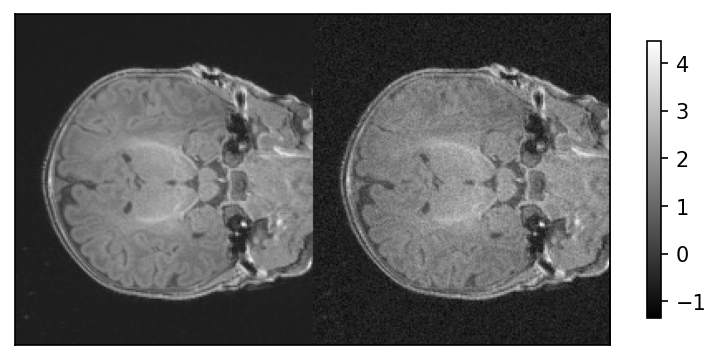

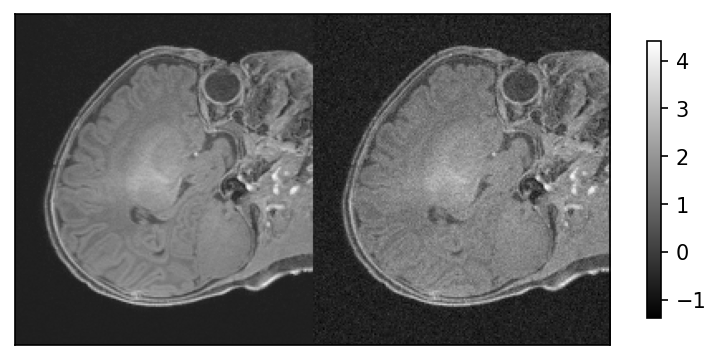

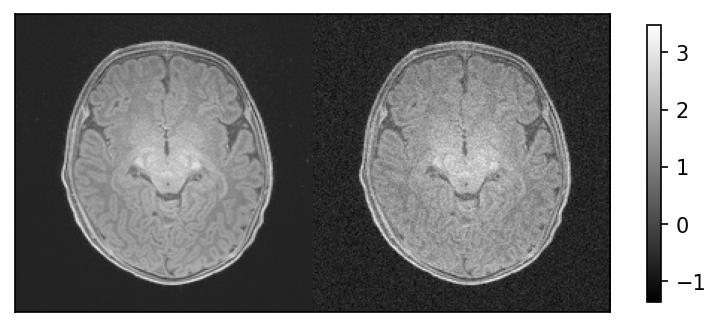

In [114]:
xx = 100
yy = 80
zz = 100
show_img(np.concatenate((tmp[xx,:,:].squeeze(), noisy_data[xx,:,:].squeeze()),1))
show_img(np.concatenate((tmp[:,yy,:].squeeze(), noisy_data[:,yy,:].squeeze()),1))
show_img(np.concatenate((tmp[:,:,zz].squeeze(), noisy_data[:,:,zz].squeeze()),1))

In [115]:
print(tmp.shape)
print(noisy_data.shape)

torch.Size([200, 200, 180])
(200, 200, 180)


In [129]:
np.save('BCP_G_clean.npy', tmp.squeeze())

In [130]:
np.save('BCP_G_noisy.npy', noisy_data.squeeze())

In [131]:
import numpy as np
raw_data = np.load('D:\WACV/2023.05.26_Preprocessing_NA/1. RandomNoise/BCP_G_clean.npy')
print('Loaded data of size:', raw_data.shape)

noisy_data = np.load('D:/WACV/2023.05.26_Preprocessing_NA/1. RandomNoise/BCP_G_noisy.npy')
print('Loaded data of size:', noisy_data.shape)

Loaded data of size: (200, 200, 180)
Loaded data of size: (200, 200, 180)


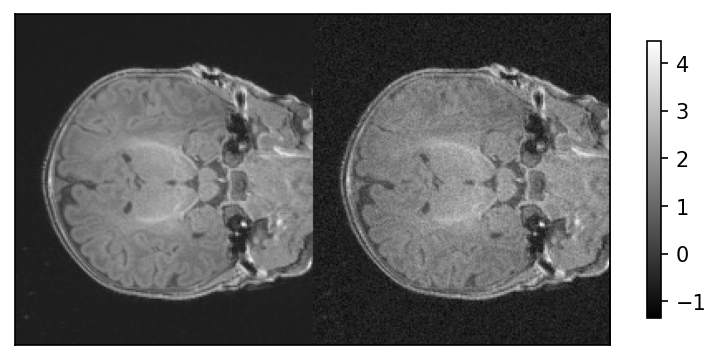

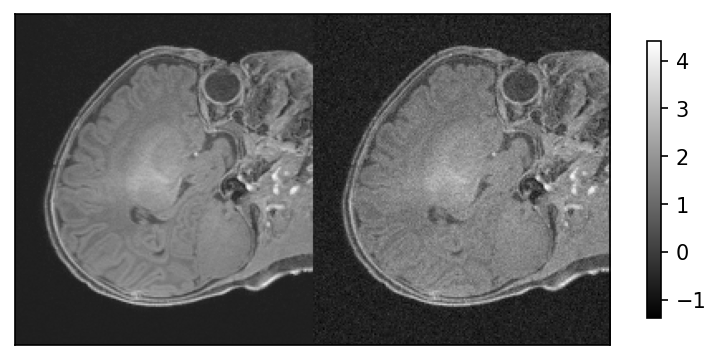

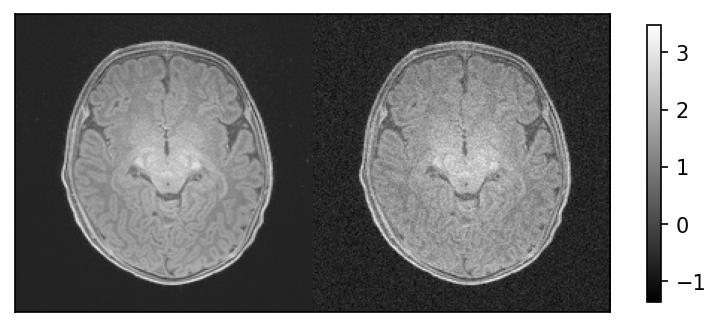

In [132]:
xx = 100
yy = 80
zz = 100
show_img(np.concatenate((raw_data[xx,:,:].squeeze(), noisy_data[xx,:,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,yy,:].squeeze(), noisy_data[:,yy,:].squeeze()),1))
show_img(np.concatenate((raw_data[:,:,zz].squeeze(), noisy_data[:,:,zz].squeeze()),1))